In [1]:
# Adding necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset
hotel_df = pd.read_csv('filtrado.csv')

In [3]:
# Information about the dataset
print("Dataset Info:")
hotel_df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117263 entries, 0 to 117262
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      117263 non-null  int64  
 1   hotel                           117263 non-null  object 
 2   is_canceled                     117263 non-null  int64  
 3   lead_time                       117263 non-null  int64  
 4   arrival_date_year               117263 non-null  int64  
 5   arrival_date_month              117263 non-null  object 
 6   arrival_date_week_number        117263 non-null  int64  
 7   arrival_date_day_of_month       117263 non-null  int64  
 8   stays_in_weekend_nights         117263 non-null  int64  
 9   stays_in_week_nights            117263 non-null  int64  
 10  adults                          117263 non-null  int64  
 11  children                        117263 non-null  float64
 12  ba

In [4]:
# Head diplays first 5 rows
print("\nFirst 5 Rows:")
print(hotel_df.head())


First 5 Rows:
   Unnamed: 0         hotel  is_canceled  lead_time  arrival_date_year  \
0           2  Resort Hotel            0          7               2015   
1           3  Resort Hotel            0         13               2015   
2           4  Resort Hotel            0         14               2015   
3           5  Resort Hotel            0         14               2015   
4           6  Resort Hotel            0          0               2015   

  arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0               July                        27                          1   
1               July                        27                          1   
2               July                        27                          1   
3               July                        27                          1   
4               July                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  ...  deposit_type  agent  \

In [5]:
# Dropping the 'Unnamed: 0' column as it seems to be an index column with no approproiate meaning
hotel_df.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
#  Check for missing values (if any)
hotel_df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [7]:
# Statistical summary
print("\nSummary Statistics:")
print(hotel_df.describe())


Summary Statistics:
         is_canceled      lead_time  arrival_date_year  \
count  117263.000000  117263.000000      117263.000000   
mean        0.373801     104.479887        2016.160664   
std         0.483814     106.946412           0.706854   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      70.000000        2016.000000   
75%         1.000000     161.000000        2017.000000   
max         1.000000     709.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             117263.000000              117263.000000   
mean                  27.142679                  15.807407   
std                   13.576785                   8.784655   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   27.000000                  16.000000   
75%                   

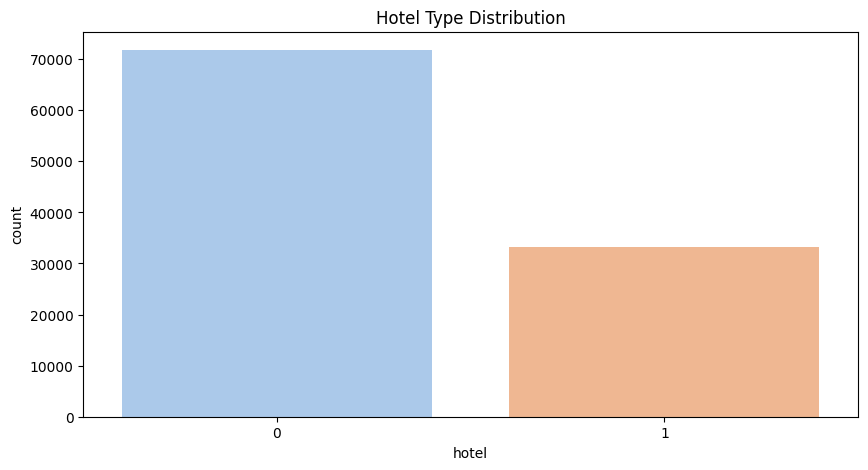

In [25]:
# Visualizing categorical variable distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=hotel_df, x='hotel', palette='pastel')
plt.title('Hotel Type Distribution')
plt.show()

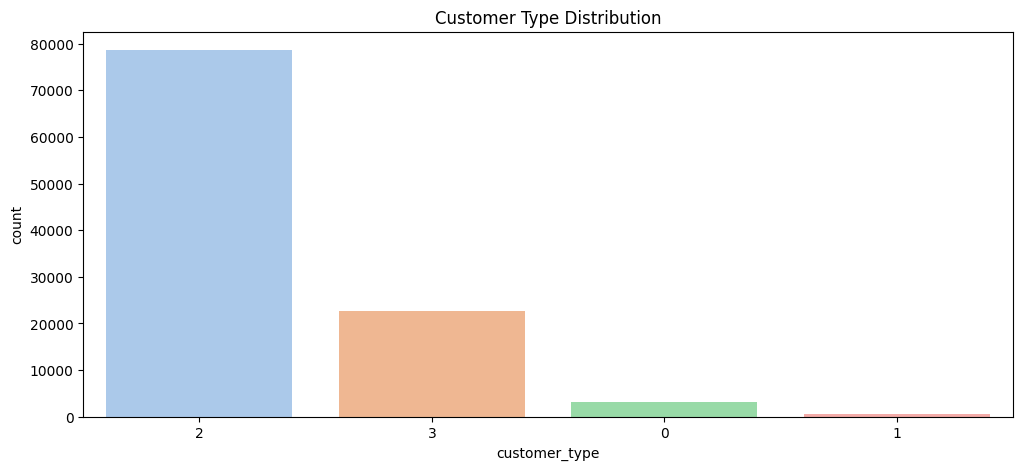

In [24]:
plt.figure(figsize=(12, 5))
sns.countplot(data=hotel_df, x='customer_type', palette='pastel', order=hotel_df['customer_type'].value_counts().index)
plt.title('Customer Type Distribution')
plt.show()

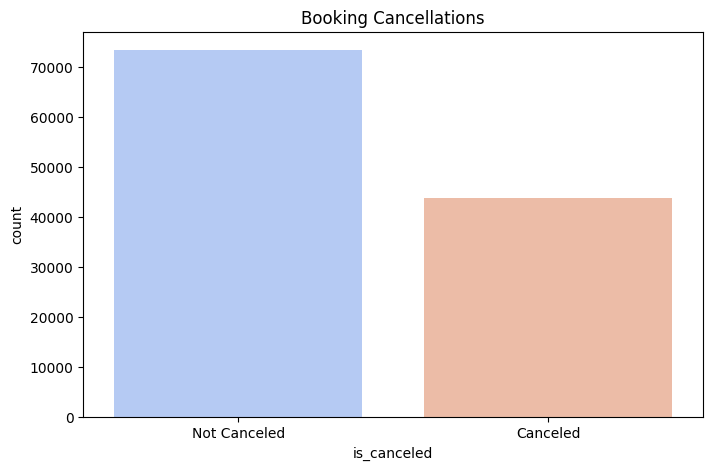

In [9]:
# Visualizing cancellation rates
plt.figure(figsize=(8, 5))
sns.countplot(data=hotel_df, x='is_canceled', palette='coolwarm')
plt.title('Booking Cancellations')
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'])
plt.show()

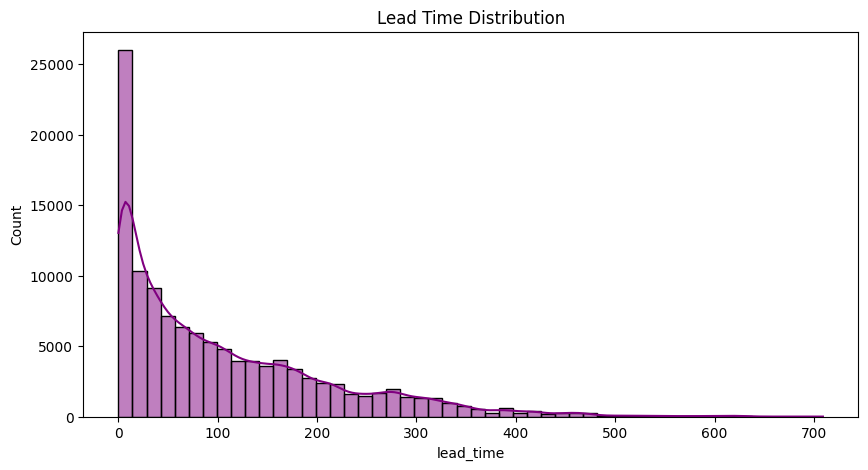

In [10]:
# Distribution of lead time
plt.figure(figsize=(10, 5))
sns.histplot(hotel_df['lead_time'], bins=50, kde=True, color='purple')
plt.title('Lead Time Distribution')
plt.show()

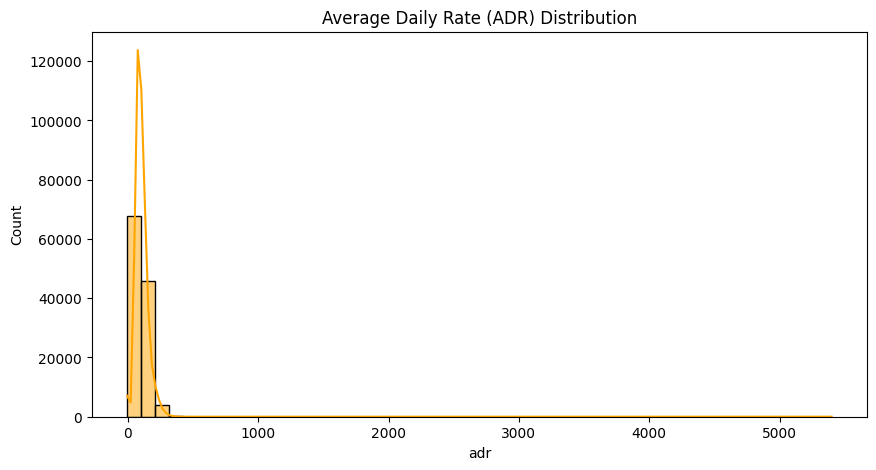

In [11]:
# Average daily rate distribution
plt.figure(figsize=(10, 5))
sns.histplot(hotel_df['adr'], bins=50, kde=True, color='orange')
plt.title('Average Daily Rate (ADR) Distribution')
plt.show()

In [12]:
# Encoding categorical variables
categorical_cols = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
                    'distribution_channel', 'reserved_room_type', 'assigned_room_type',
                    'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']

label_encoder = LabelEncoder()
for col in categorical_cols:
    hotel_df[col] = label_encoder.fit_transform(hotel_df[col])

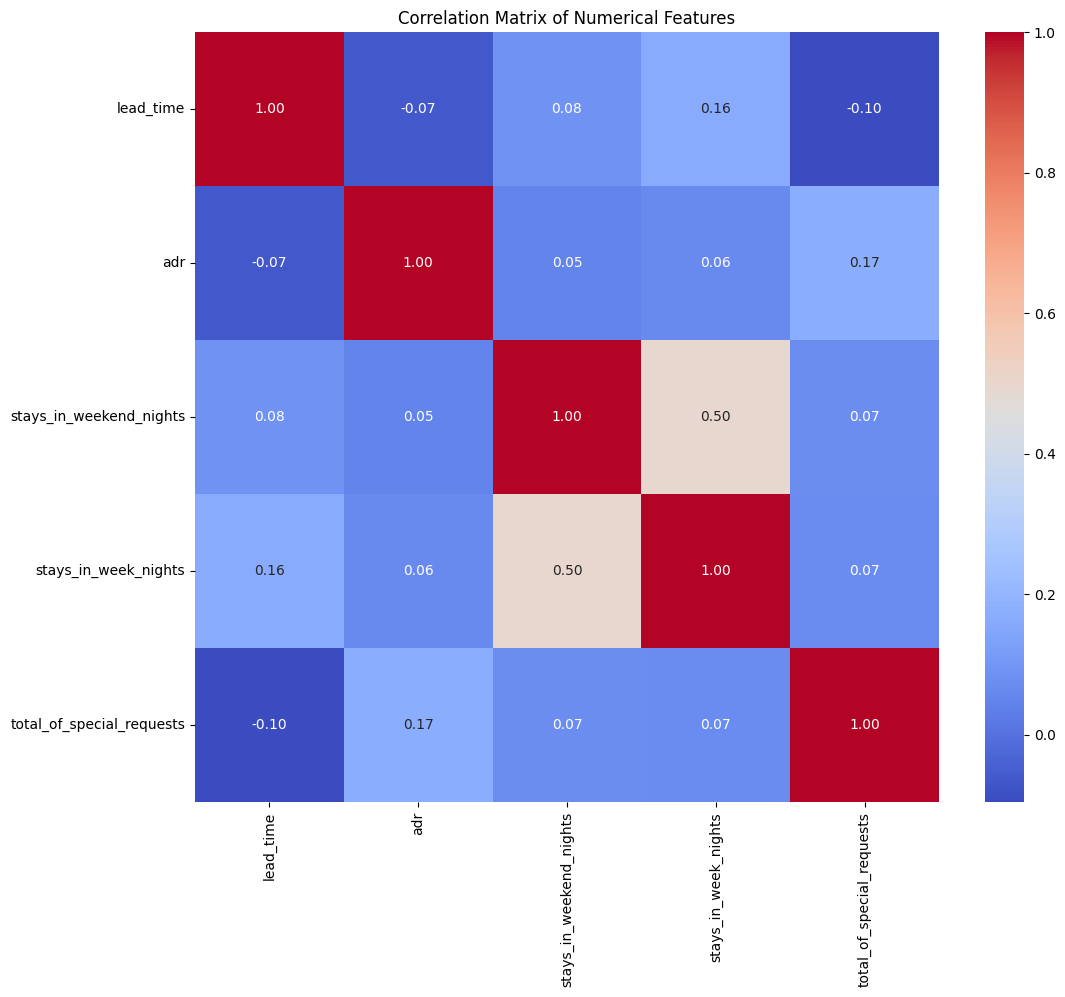

In [16]:
# Correlation matrix of numerical features
numerical_cols = ['lead_time', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights', 'total_of_special_requests']
plt.figure(figsize=(12, 10))
correlation_matrix = hotel_df[numerical_cols[:5]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

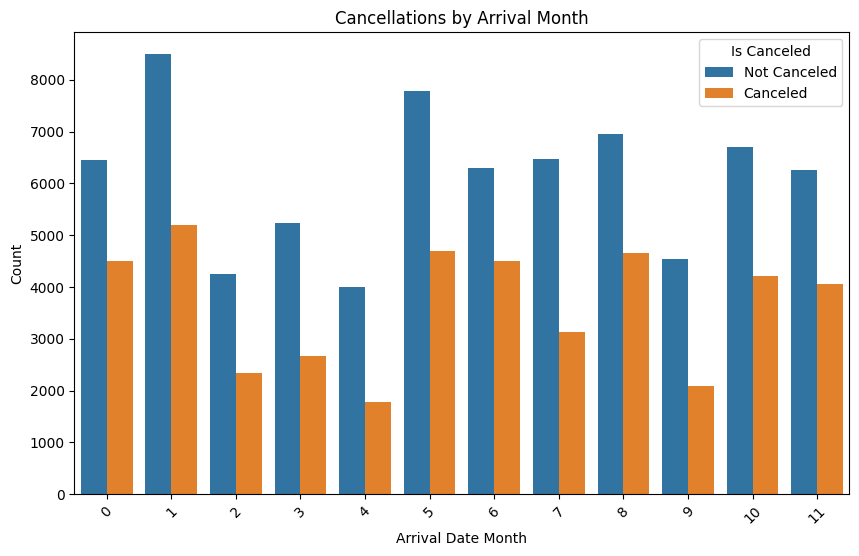

In [18]:
# Plotting the bar chart of 'arrival_date_month' against the count of cancellations
plt.figure(figsize=(10, 6))
sns.countplot(x='arrival_date_month', hue='is_canceled', data=hotel_df)
plt.title('Cancellations by Arrival Month')
plt.xlabel('Arrival Date Month')
plt.ylabel('Count')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.xticks(rotation=45)
plt.show()

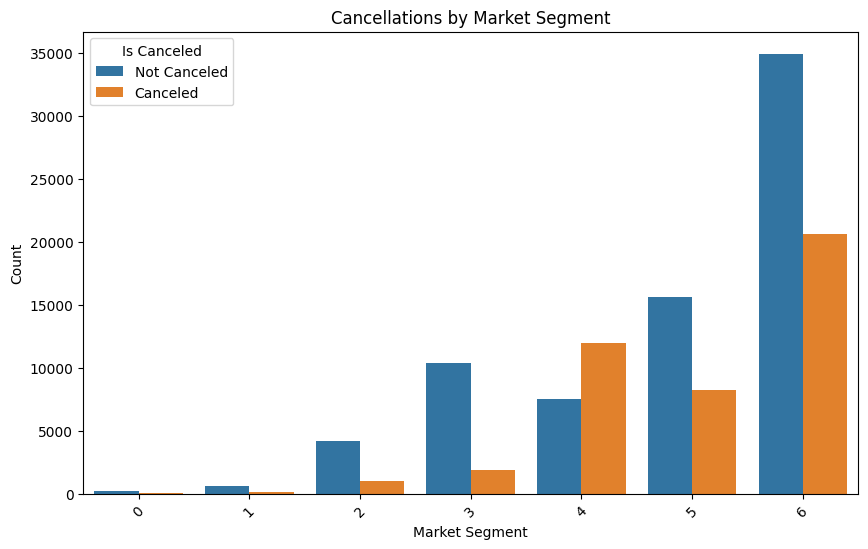

In [19]:
# Plotting the bar chart of 'market_segment' against the count of cancellations
plt.figure(figsize=(10, 6))
sns.countplot(x='market_segment', hue='is_canceled', data=hotel_df)
plt.title('Cancellations by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.xticks(rotation=45)
plt.show()

# Outlier detection

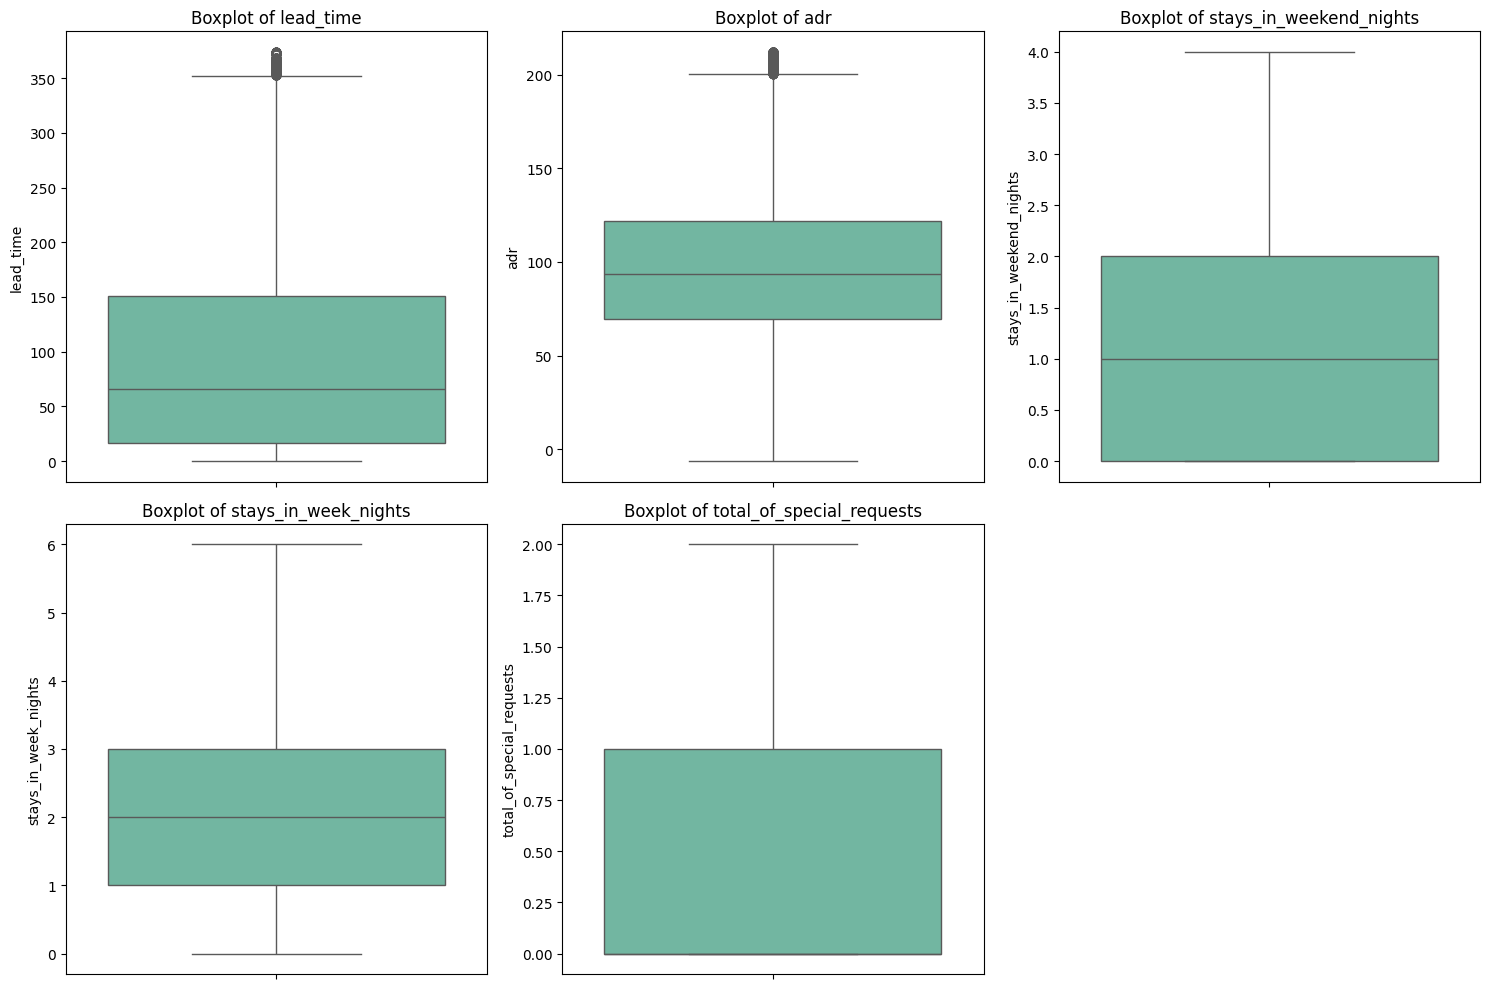

In [23]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=hotel_df[col], palette='Set2')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [21]:
# Removing outliers using the IQR method
for col in numerical_cols:
    Q1 = hotel_df[col].quantile(0.25)
    Q3 = hotel_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    hotel_df = hotel_df[(hotel_df[col] >= lower_bound) & (hotel_df[col] <= upper_bound)]

print("\nOutliers removed, updated dataset shape:", hotel_df.shape)


Outliers removed, updated dataset shape: (104986, 32)


### The above visulizations provides an understanding of how variables are related to each other. 
### The EDA covers like dataset loading, checking misssing values, statistical summary distribution,outlier detection. 
### In the next phase I will start data preprocessing and model implementation